In [ ]:
#import numpy for array processing
import numpy as np #np is shorten, numpy is to inicate that the data will be in matrices
#
import os #use to load and pre process the dataset
import time
#import tensorflow-related modules
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image 
# it provides utilities for working wt imgae data, text data and sequence data
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions #
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import utils
#import scikit-learn modules
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #library for plotting graph

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#import numpy for array processing
import numpy as np #np is shorten, numpy is to inicate that the data will be in matrices
#
import os #use to load and pre process the dataset
import time
#get the current directory
PATH = os.getcwd()
data_path = f"{PATH}\\picture"
print(data_path)

C:\Users\tnich\Documents\projectnn\picture


In [4]:
#get the files inside the directory
data_dir_list = os.listdir(data_path)
print(data_dir_list)

['dogs', 'Humans']


In [5]:
img_data_list=[] #Create array to store image

#loop through the directory
for dataset in data_dir_list: #read data in files
    dir_ff = f"{data_path}\\{dataset}"
    img_list=os.listdir(dir_ff)#+'/'+ dataset) #explore images in data_path and return a list containing name entries to direcory
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:  #for image in img_list
        img_path = f"{data_path}\\{dataset}\\{img}" #: set img as img_path
        img = image.load_img(img_path, target_size=(224, 224)) #Load image aordding to the size given in target
        x = image.img_to_array(img)#take the variable img in array
        #x = np.expand_dims(x, axis=0)
        x = preprocess_input(x) #for predefined imagenet networks: it's a function meant to adequate image accord to what model require
        #print('Input image shape:', x.shape)
        img_data_list.append(x) #add x (in this case an image) to the list (in this case array) 
print(len(img_data_list))

Loaded the images of dataset-dogs

Loaded the images of dataset-Humans

404


In [6]:
img_data = np.array(img_data_list);
print(img_data.shape);

(404, 224, 224, 3)


In [7]:
#img_data = np.rollaxis(img_data,1,0); #what is this for?? 
# print(img_data.shape);
# imgdata = img_data[0]; # what's for?? 
# print(img_data.shape)

In [8]:
#define classes
num_class = 2;
num_of_sample = img_data.shape[0];
print(num_of_sample);

404


In [9]:
#label images
labels = np.ones((num_of_sample), dtype='int64');
labels[0:202]=0 ;
labels[202:404]=1;
names = ['Dog', 'Human'];

In [10]:
#assign Y as label
y = utils.to_categorical(labels, num_class);
#random dataset for training
x,y = shuffle(img_data, y, random_state=2);

In [11]:
# Split the dataset
#split the array or matrices into random tran and test subset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2) #why test size is 0.2 ??? 

In [12]:
#custom vgg model
# this for training the classifier 
img_input = Input(shape=(224,224,3));
model = VGG16(input_tensor = img_input, include_top = True, weights = 'imagenet');
#summary part
model.summary()
#weights
#output from VGG16 will become the last layer
last_layer = model.get_layer('fc2').output 
#connect last layer with the hiddenlayers?? 
out = Dense(num_class, activation = 'softmax', name = 'output')(last_layer);
custom_vgg_model = Model(img_input, out);
custom_vgg_model.summary();

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________

In [13]:

#not trainging the last layer
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

t=time.time()
#t = now()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=4, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


Train on 323 samples, validate on 81 samples
Epoch 1/4
323/323 [==============================] - 110s 340ms/sample - loss: 0.2024 - acc: 0.9195 - val_loss: 0.0351 - val_acc: 0.9753
Epoch 2/4
323/323 [==============================] - 108s 334ms/sample - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0153 - val_acc: 1.0000
Epoch 3/4
323/323 [==============================] - 108s 333ms/sample - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0173 - val_acc: 1.0000
Epoch 4/4
323/323 [==============================] - 108s 333ms/sample - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0121 - val_acc: 1.0000
Training time: -433.37149691581726
81/81 [==============================] - 22s 273ms/sample - loss: 0.0121 - acc: 1.0000
[INFO] loss=0.0121, accuracy: 100.0000%


In [14]:
#Training the feature extraction also

image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')

model.summary()

last_layer = model.get_layer('block5_pool').output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dense(128, activation='relu', name='fc2')(x) #at the emd there are 128 output
out = Dense(num_class, activation='softmax', name='output')(x)

custom_vgg_model2 = Model(image_input, out)
custom_vgg_model2.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [1]:
# freeze all the layers except the dense layers
for layer in custom_vgg_model2.layers[:-3]:
    layer.trainable = False

custom_vgg_model2.summary()

#custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
custom_vgg_model2.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

t=time.time()
#t = now()
hist = custom_vgg_model2.fit(X_train, y_train, batch_size=32, epochs=4, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


NameError: name 'custom_vgg_model2' is not defined

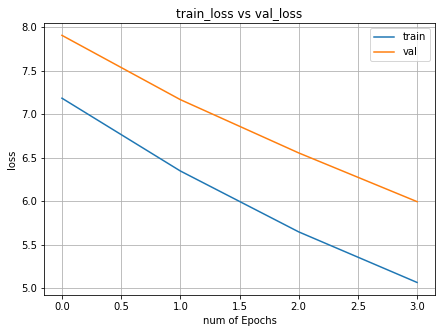

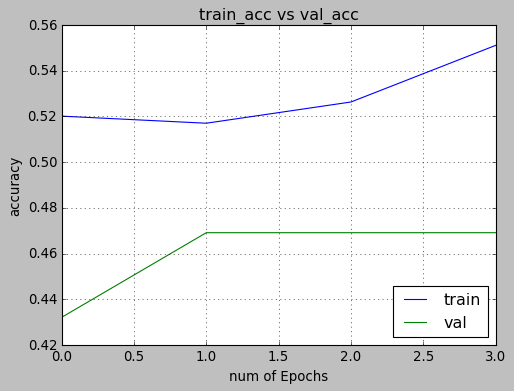

In [16]:
#%%

# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(4)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [17]:
# Save predictions for future checks
predictions = model.predict(X_test)

# Save the model
model.save('path_to_my_model.h5')

#encoder.compile()
